In [34]:
# sympy
import sympy as sp
from IPython.display import display, Math
sp.init_printing()

# numpy
import numpy as np

# matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

plt.style.use('seaborn-whitegrid')
plt.rcParams.update({"text.usetex": True})
plt.rcParams.update({'legend.frameon': True,
                     'legend.framealpha': 1,
                     'legend.facecolor': 'white',
                     'axes.titlesize': 20,
                     'axes.labelsize': 16,
                     'legend.fontsize': 14,
                     'axes.edgecolor': 'black'})

# Symbolic Derivation

## Wind-Aware Control Law

In [104]:
k = sp.symbols('k', real=True, positive=True)
T = sp.symbols('T', real=True, positive=True)
vGP = sp.symbols('v_{G\,P}', real=True, positive=True)
xP = sp.symbols('x_P', real=True)
vA = sp.symbols('v_A', real=True, positive=True)
vW = sp.symbols('v_W', real=True, positive=True)
kapP = sp.symbols('\\kappa_P', real=True, positive=True)
lP = sp.symbols('\\lambda_P', real=True)

# wind frequency
omW = sp.symbols('\\omega_W')
omW_expr = vGP * kapP * sp.tan(xP)

# ground to air projection ratio
a = sp.symbols('a')
a_expr = vGP / vA / sp.cos(xP)

# linearized on-track dynamics
d_etadot_d_eta = sp.symbols('\\cfrac{\\partial\\dot{\\eta}}{\\partial\\eta}')
d_etadot_d_beta = sp.symbols('\\cfrac{\\partial\\dot{\\eta}}{\\partial\\beta}')
d_betadot_d_eta = sp.symbols('\\cfrac{\\partial\\dot{\\beta}}{\\partial\\eta}')
d_betadot_d_beta = sp.symbols('\\cfrac{\\partial\\dot{\\beta}}{\\partial\\beta}')
d_etadot_d_eta_expr = -k + sp.pi/T
d_etadot_d_beta_expr = a * ( omW - sp.pi / T )
d_betadot_d_eta_expr = sp.pi / T / a
d_betadot_d_beta_expr = omW - sp.pi / T

print('Jacobian:')
display(Math('%s = %s' %(sp.latex(d_etadot_d_eta), sp.latex(d_etadot_d_eta_expr.subs({omW:omW_expr,a:a_expr})))))
display(Math('%s = %s' %(sp.latex(d_etadot_d_beta), sp.latex(d_etadot_d_beta_expr.subs({omW:omW_expr,a:a_expr})))))
display(Math('%s = %s' %(sp.latex(d_betadot_d_eta), sp.latex(d_betadot_d_eta_expr.subs({omW:omW_expr,a:a_expr})))))
display(Math('%s = %s' %(sp.latex(d_betadot_d_beta), sp.latex(d_betadot_d_beta_expr.subs({omW:omW_expr,a:a_expr})))))

print('Collect terms:')
display(Math('%s = %s' %(sp.latex(omW), sp.latex(omW_expr))))
display(Math('%s = %s' %(sp.latex(a), sp.latex(a_expr))))

print('Condensed Jacobian:')
AMatrix = sp.Matrix([[d_etadot_d_eta, d_etadot_d_beta], [d_betadot_d_eta, d_betadot_d_beta]])
AMatrix_expr = sp.Matrix([[d_etadot_d_eta_expr, d_etadot_d_beta_expr], [d_betadot_d_eta_expr, d_betadot_d_beta_expr]])

display(Math('%s = %s' %(sp.latex(AMatrix), sp.latex(AMatrix_expr))))


Jacobian:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Collect terms:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Condensed Jacobian:


<IPython.core.display.Math object>

In [16]:
# characteristic equation
s = sp.symbols('s')
s_m_A = sp.Matrix([[s,0],[0,s]]) - AMatrix_expr
char_eq = s_m_A.det()

print('Characteristic equation:')
# display(expand(char_eq))

# collect coeffs
char_eq_poly = sp.poly(char_eq, s)
char_eq_coeffs = char_eq_poly.coeffs()

display(Math('%s + (%s)s + (%s)' %(sp.latex(s**2),
                                   sp.latex(sp.expand(char_eq_coeffs[1])),
                                   sp.latex(sp.expand(char_eq_coeffs[2])))))

# natural frequency
print('Natural frequency:')
omn = sp.symbols('\\omega_n')
omn_expr = sp.sqrt(sp.expand(char_eq_coeffs[2]))
display(Math('%s = %s' %(sp.latex(omn), sp.latex(omn_expr))))

# damping ratio
print('Damping ratio:')
zeta = sp.symbols('\\zeta')
zeta_expr = sp.simplify(sp.expand(char_eq_coeffs[1] / 2 / omn_expr))
display(Math('%s = %s' %(sp.latex(zeta), sp.latex(zeta_expr))))

Characteristic equation:


<IPython.core.display.Math object>

Natural frequency:


<IPython.core.display.Math object>

Damping ratio:


<IPython.core.display.Math object>

## Ground Speed Based Control Law

In [20]:
# ground speed based control law

omP = sp.symbols('\\omega_P')

d_etadot_d_eta_gsp_expr = -k/a + sp.pi/T + kapP * vW * sp.sin(lP) * (a - 1)
d_etadot_d_beta_gsp_expr = a * ( omW * (vGP - 2) - sp.pi / T ) + omW + omP**2 * T / sp.pi * (1 - a)
d_betadot_d_eta_gsp_expr = sp.pi / T / a
d_betadot_d_beta_gsp_expr = omW - sp.pi / T

print('Jacobian:')
display(Math('%s = %s' %(sp.latex(d_etadot_d_eta), sp.latex(d_etadot_d_eta_gsp_expr.subs({omW:omW_expr,a:a_expr})))))
display(Math('%s = %s' %(sp.latex(d_etadot_d_beta), sp.latex(d_etadot_d_beta_gsp_expr.subs({omW:omW_expr,a:a_expr})))))
display(Math('%s = %s' %(sp.latex(d_betadot_d_eta), sp.latex(d_betadot_d_eta_gsp_expr.subs({omW:omW_expr,a:a_expr})))))
display(Math('%s = %s' %(sp.latex(d_betadot_d_beta), sp.latex(d_betadot_d_beta_gsp_expr.subs({omW:omW_expr,a:a_expr})))))

print('Condensed Jacobian:')
AMatrix_gsp_expr = sp.Matrix([[d_etadot_d_eta_gsp_expr, d_etadot_d_beta_gsp_expr], [d_betadot_d_eta_gsp_expr, d_betadot_d_beta_gsp_expr]])

display(Math('%s = %s' %(sp.latex(AMatrix), sp.latex(AMatrix_gsp_expr))))

# characteristic equation
s_m_A_gsp = sp.Matrix([[s,0],[0,s]]) - AMatrix_gsp_expr
char_eq_gsp = s_m_A_gsp.det()

print('Characteristic equation:')
# display(expand(char_eq_gsp))

# collect coeffs -- straight paths
char_eq_gsp_poly = sp.poly(char_eq_gsp, s)
char_eq_gsp_coeffs = char_eq_gsp_poly.coeffs()

display(Math('%s + (%s)s + (%s)' %(sp.latex(s**2),
                                   sp.latex(sp.expand(char_eq_gsp_coeffs[1].subs({kapP:0, omW:0, omP:0}))),
                                   sp.latex(sp.expand(char_eq_gsp_coeffs[2].subs({kapP:0, omW:0, omP:0}))))))

# natural frequency
print('Natural frequency:')
omn = sp.symbols('\\omega_n')
omn_gsp_expr = sp.sqrt(sp.expand(char_eq_gsp_coeffs[2].subs({kapP:0, omW:0, omP:0})))
display(Math('%s = %s' %(sp.latex(omn), sp.latex(omn_gsp_expr))))

# damping ratio
print('Damping ratio:')
zeta = sp.symbols('\\zeta')
zeta_gsp_expr = sp.simplify(sp.expand(char_eq_gsp_coeffs[1].subs({kapP:0, omW:0, omP:0}) / 2 / omn_gsp_expr))
display(Math('%s = %s' %(sp.latex(zeta), sp.latex(zeta_gsp_expr))))

Jacobian:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Condensed Jacobian:


<IPython.core.display.Math object>

Characteristic equation:


<IPython.core.display.Math object>

Natural frequency:


<IPython.core.display.Math object>

Damping ratio:


<IPython.core.display.Math object>

In [22]:
# nominal gains (zero wind case)

om0 = sp.symbols('\\omega_0', positive = True, real = True)
zeta0 = sp.symbols('\\zeta_0', positive = True, real = True)

k0 = sp.symbols('k_0', positive = True, real = True)
k0_expr = 2 * zeta0 * om0
display(Math('%s = %s' %(sp.latex(k0), sp.latex(k0_expr))))

T0 = sp.symbols('T_0', positive = True, real = True)
T0_expr = 2 * sp.pi / om0 * zeta0
display(Math('%s = %s' %(sp.latex(T0), sp.latex(T0_expr))))

# plug in and confirm it works when wind freq = 0
display(Math('%s(%s=%s,%s=%s,%s=0) = %s = %s' %(sp.latex(omn),sp.latex(k),sp.latex(k0), \
                                                sp.latex(T),sp.latex(T0),sp.latex(omW), \
                                                sp.latex(omn_expr.subs({omW:0, k:k0, T:T0})), \
                                                sp.latex(omn_expr.subs({omW:0, k:k0_expr, T:T0_expr})))))
display(Math('%s(%s=%s,%s=%s,%s=0) = %s = %s' %(sp.latex(zeta),sp.latex(k),sp.latex(k0), \
                                                sp.latex(T),sp.latex(T0),sp.latex(omW), \
                                                sp.latex(zeta_expr.subs({omW:0, k:k0, T:T0})), \
                                                sp.latex(zeta_expr.subs({omW:0, k:k0_expr, T:T0_expr})))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [105]:
# P0 = sp.symbols('P_0', real=True, positive=True)
# zeta0 = sp.symbols('\\zeta_0', real=True, positive=True)

# xP_expr = sp.asin(vW/vA * sp.sin(lP))
# vGP_expr = vW * sp.cos(lP) + vA * sp.cos(xP_expr) 
# omW_expr_exp = omW_expr.subs({vGP:vGP_expr,xP:xP_expr})

# Tadapt = sp.symbols('T_{adapt}')
# Tadapt_expr1 = sp.simplify(sp.pi * (P0**2 * omW_expr_exp + 4*sp.pi*P0*zeta0) / (P0**2 * omW_expr_exp**2 + 4*sp.pi*P0*omW_expr_exp*zeta0 + 4 * sp.pi**2))
# Tadapt_expr = sp.simplify(sp.pi*P0*sp.sqrt(vA**2 - vW**2*sp.sin(lP)**2)*(P0*kapP*vW*(vW*sp.cos(lP) + sp.sqrt(vA**2 - vW**2*sp.sin(lP)**2))*sp.sin(lP) + 4*sp.pi*zeta0) / (P0**2*kapP**2*vW**2*(vW*sp.cos(lP) + sp.sqrt(vA**2 - vW**2*sp.sin(lP)**2))**2*sp.sin(lP)**2 + 4*sp.pi*P0*kapP*zeta0*vW*sp.sqrt(vA**2 - vW**2*sp.sin(lP)**2)*(vW*sp.cos(lP) + sp.sqrt(vA**2 - vW**2*sp.sin(lP)**2))*sp.sin(lP) + 4*sp.pi**2*(vA**2 - vW**2*sp.sin(lP)**2)))

# display(Math('%s = %s' %(sp.latex(Tadapt),sp.latex(Tadapt_expr1))))
# display(Math('%s = %s' %(sp.latex(Tadapt),sp.latex(Tadapt_expr))))



<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Numerical Evaluation

## Check the Solutions...

In [106]:
# helpful functions

def evalOmW(kapP, lP, vA, vW):
    xP = np.arcsin(vW/vA * np.sin(lP))
    psiP = lP + xP
    vGP = np.sqrt(vA**2 + vW**2 - 2*vA*vW*np.cos(np.pi - psiP))
    return kapP * vGP * np.tan(xP)

# Check the developed Jacobian

def evalJac(k, T, kapP, lP, vA, vW):
    
    # n = 0
    # b = 0
    
    xP = np.arcsin(vW/vA * np.sin(lP))
    psiP = lP + xP
    vGP = np.sqrt(vA**2 + vW**2 - 2*vA*vW*np.cos(np.pi - psiP))
    
    a11 = -k + np.pi/T
    a12 = vGP**2 * kapP * np.tan(xP) / vA / np.cos(xP) - vGP / vA / np.cos(xP) * np.pi / T
    a21 = np.pi / T * vA * np.cos(xP) / vGP
    a22 = vGP * kapP * np.tan(xP) - np.pi / T

    return np.array([a11, a12, a21, a22])


def evalDyn(n, b, k, T, kapP, lP, vA, vW):
    
    ll = b + lP
    
    xl = np.arcsin(vW / vA * np.sin(ll))
    
    psi = b - n + lP + xl
    
    vG = np.sqrt(vA**2 + vW**2 - 2*vA*vW*np.cos(np.pi - psi))
    
    x = np.arccos((vA**2 - vW**2 + vG**2) / (2 * vA * vG))
    
    n_P = n - b + x - xl
    
    vGl = vW * np.cos(ll) + vA * np.cos(xl)
    
    e = -b * vG * T / np.pi
    
    omP = kapP * vG * np.cos(n_P) / (1 - kapP * e)
    
    psidot = k * np.sin(n) + vGl / vA / np.cos(xl) * omP
    
    vGdot = -vA*vW*np.sin(psi) / vG * psidot
    
    bdot = -b * vGdot / vG + np.pi / T * np.sin(n_P)
   
    ndot = -psidot + vGl / vA / np.cos(xl) * (bdot + omP)

    return ndot, bdot


def evalNumJac(n0, b0, k, T, kapP, lP, vA, vW):
    
    dn = 0.000001
    db = 0.000001
    twod = dn*2

    dndot_dn_p, dbdot_dn_p = evalDyn(n0 + dn, b0, k, T, kapP, lP, vA, vW)
    dndot_dn_m, dbdot_dn_m = evalDyn(n0 - dn, b0, k, T, kapP, lP, vA, vW)
    dndot_db_p, dbdot_db_p = evalDyn(n0, b0 + db, k, T, kapP, lP, vA, vW)
    dndot_db_m, dbdot_db_m = evalDyn(n0, b0 - db, k, T, kapP, lP, vA, vW)
    
    dndot_dn = (dndot_dn_p - dndot_dn_m) / twod
    dndot_db = (dndot_db_p - dndot_db_m) / twod
    dbdot_dn = (dbdot_dn_p - dbdot_dn_m) / twod
    dbdot_db = (dbdot_db_p - dbdot_db_m) / twod
    
    return np.array([dndot_dn, dndot_db, dbdot_dn, dbdot_db])


n1 = 0.0
b1 = 0.0
k1 = 0.11
T1 = 7.0
kapP1 = 1.0 / 50.0
lP1 = 0.52
vA1 = 15.0
vW1 = 10.0

ndot0, bdot0 = evalDyn(n1, b1, k1, T1, kapP1, lP1, vA1, vW1)
jacAnalytic = evalJac(k1, T1, kapP1, lP1, vA1, vW1)
jacNumerical = evalNumJac(n1, b1, k1, T1, kapP1, lP1, vA1, vW1)

display('Equilibrium Diff. Eq.: ndot0 = %s, bdot0 = %s' %(ndot0,bdot0,))
display('Numerical Jacobian: %s' %jacNumerical)
display('Analytic Jacobian: %s' %jacAnalytic)

'Equilibrium Diff. Eq.: ndot0 = 2.220446049250313e-16, bdot0 = 1.2456673207173685e-16'

'Numerical Jacobian: [ 0.33879895 -0.4653803   0.27821032 -0.28848909]'

'Analytic Jacobian: [ 0.33879895 -0.4653803   0.27821032 -0.28848909]'

## What does it look like when we use adaptive control parameters?

In [119]:
# investigate adaptive gains

# lambdify_T_adapt = sp.lambdify((kapP, lP, vA, vW, P0, zeta0,), Tadapt_expr)

def evalKAdapt(kapP, lP, vA, vW, P0, zeta0):    
    
    return evalOmW(kapP, lP, vA, vW) + 4 * np.pi * zeta0 / P0


def evalTAdapt(kapP, lP, vA, vW, P0, zeta0):
    
#     return lambdify_T_adapt(kapP, lP, vA, vW, P0, zeta0)
    omW = evalOmW(kapP, lP, vA, vW)
    return np.pi * (P0**2 * omW + 4*np.pi*P0*zeta0) / (P0**2 * omW**2 + 4*np.pi*P0*omW*zeta0 + 4 * np.pi**2)


def evalDynAdaptKT(n, b, P0, zeta0, kapP, lP, vA, vW):
    
    k = evalKAdapt(kapP, lP, vA, vW, P0, zeta0)
    T = evalTadapt(kapP, lP, vA, vW, P0, zeta0)
    
    ll = b + lP
    
    xl = np.arcsin(vW / vA * np.sin(ll))
    
    psi = b - n + lP + xl
    
    vG = np.sqrt(vA**2 + vW**2 - 2*vA*vW*np.cos(np.pi - psi))
    
    x = np.arccos((vA**2 - vW**2 + vG**2) / (2 * vA * vG))
    
    n_P = n - b + x - xl
    
    vGl = vW * np.cos(ll) + vA * np.cos(xl)
    
    e = -b * vG * T / np.pi
    
    omP = kapP * vG * np.cos(n_P) / (1 - kapP * e)
    
    psidot = k * np.sin(n) + vGl / vA / np.cos(xl) * omP
    
    vGdot = -vA*vW*np.sin(psi) / vG * psidot
    
    db_dT = -b / T
    omW = evalOmW(kapP, lP, vA, vW)
    xP = np.arcsin(vW/vA * np.sin(lP))
    omWdot = -omP * vW * ( np.sin(lP) + np.tan(xP) * np.cos(lP)  )
    den = P0**2 * omW**2 + 4 * np.pi * P0 * zeta0 * omW + 4 * np.pi**2
    Tdot = np.pi * P0**2 * omWdot * ( 1/den - 2*omW*P0*(P0*omW + 2*np.pi*zeta0) / den**2 )
    
    bdot = -b * vGdot / vG + np.pi / T * np.sin(n_P) + db_dT * Tdot
   
    ndot = -psidot + vGl / vA / np.cos(xl) * (bdot + omP)

    return ndot, bdot


def evalNumJacAdaptKT(n0, b0, P0, zeta0, kapP, lP, vA, vW):
    
    dn = 0.000001
    db = 0.000001
    twod = dn*2

    dndot_dn_p, dbdot_dn_p = evalDynAdaptKT(n0 + dn, b0, P0, zeta0, kapP, lP, vA, vW)
    dndot_dn_m, dbdot_dn_m = evalDynAdaptKT(n0 - dn, b0, P0, zeta0, kapP, lP, vA, vW)
    dndot_db_p, dbdot_db_p = evalDynAdaptKT(n0, b0 + db, P0, zeta0, kapP, lP, vA, vW)
    dndot_db_m, dbdot_db_m = evalDynAdaptKT(n0, b0 - db, P0, zeta0, kapP, lP, vA, vW)
    
    dndot_dn = (dndot_dn_p - dndot_dn_m) / twod
    dndot_db = (dndot_db_p - dndot_db_m) / twod
    dbdot_dn = (dbdot_dn_p - dbdot_dn_m) / twod
    dbdot_db = (dbdot_db_p - dbdot_db_m) / twod
    
    return np.array([dndot_dn, dndot_db, dbdot_dn, dbdot_db])


vA1 = 15

P1 = 10
zeta1 = 0.7071

k1 = 4 * np.pi * zeta1 / P1 
T1 = P1 * zeta1

len_lP = 101
lP_data = np.linspace(-np.pi, np.pi, len_lP)

len_alpW = 11
alpW_data = np.linspace(0, 1, len_alpW)

Padapt = np.zeros([len_alpW, len_lP])
omadapt = np.zeros([len_alpW, len_lP])
zetaadapt = np.zeros([len_alpW, len_lP]) 

Pfixed = np.zeros([len_alpW, len_lP])
omfixed = np.zeros([len_alpW, len_lP])
zetafixed = np.zeros([len_alpW, len_lP])

kadapt = np.zeros([len_alpW, len_lP])
Tadapt = np.zeros([len_alpW, len_lP])

omW_data = np.zeros([len_alpW, len_lP])

for j in range(len_alpW):
    
    vWj = alpW_data[j] * vA1
    
    for i in range(len_lP):
        
        omW_data[j,i] = evalOmW(kapP1, lP_data[i], vA1, vWj)

        kadapt[j,i] = evalKAdapt(kapP1, lP_data[i], vA1, vWj, P1, zeta1)
        Tadapt[j,i] = evalTAdapt(kapP1, lP_data[i], vA1, vWj, P1, zeta1)

        numjaci = evalNumJacAdaptKT(0, 0, P1, zeta1, kapP1, lP_data[i], vA1, vWj)
        
        jaci = evalJac(k1, T1, kapP1, lP_data[i], vA1, vWj)
        
        omadapt[j,i] = np.sqrt(numjaci[0] * numjaci[3] - numjaci[1] * numjaci[2])
        Padapt[j,i] = 2*np.pi / omadapt[j,i]
        zetaadapt[j,i] = -(numjaci[0] + numjaci[3]) / 2 / omadapt[j,i] 

        omfixed[j,i] = np.sqrt(jaci[0] * jaci[3] - jaci[1] * jaci[2])
        Pfixed[j,i] = 2*np.pi / omfixed[j,i]
        zetafixed[j,i] = -(jaci[0] + jaci[3]) / 2 / omfixed[j,i]

<ipython-input-119-079b8cc81750>:119: RuntimeWarning: invalid value encountered in sqrt
  omadapt[j,i] = np.sqrt(numjaci[0] * numjaci[3] - numjaci[1] * numjaci[2])
<ipython-input-119-079b8cc81750>:30: RuntimeWarning: invalid value encountered in double_scalars
  x = np.arccos((vA**2 - vW**2 + vG**2) / (2 * vA * vG))
<ipython-input-119-079b8cc81750>:42: RuntimeWarning: divide by zero encountered in double_scalars
  vGdot = -vA*vW*np.sin(psi) / vG * psidot
<ipython-input-106-7c473d6fbe95>:22: RuntimeWarning: divide by zero encountered in double_scalars
  a21 = np.pi / T * vA * np.cos(xP) / vGP
<ipython-input-119-079b8cc81750>:123: RuntimeWarning: invalid value encountered in double_scalars
  omfixed[j,i] = np.sqrt(jaci[0] * jaci[3] - jaci[1] * jaci[2])
<ipython-input-119-079b8cc81750>:123: RuntimeWarning: invalid value encountered in sqrt
  omfixed[j,i] = np.sqrt(jaci[0] * jaci[3] - jaci[1] * jaci[2])


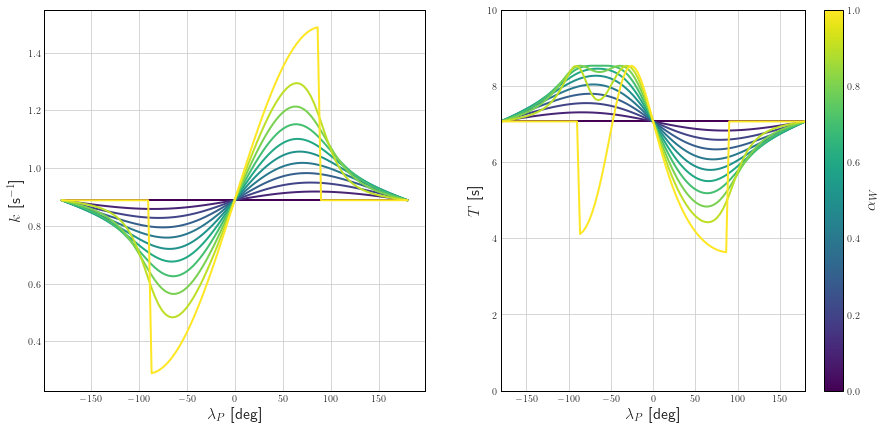

In [120]:
plot_lw = 2
cmap = plt.cm.get_cmap('viridis', len_alpW)

fig = plt.figure(figsize=(15,7))
spec = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)

ax1 = fig.add_subplot(spec[:, 0])
ax2 = fig.add_subplot(spec[:, 1])

ax1.set_xlabel(r'${\lambda_P}$ [deg]')
ax1.set_ylabel(r'$k$ [s$^{-1}$]')
for i in range(len_alpW):
    ax1.plot(np.rad2deg(lP_data), kadapt[i,:], linewidth=plot_lw, color=cmap(i))

ax2.set_xlabel(r'${\lambda_P}$ [deg]')
ax2.set_ylabel(r'$T$ [s]')
for i in range(len_alpW):
    ax2.plot(np.rad2deg(lP_data), Tadapt[i,:], linewidth=plot_lw, color=cmap(i))

ax2.set_xlim([np.rad2deg(lP_data[0]), np.rad2deg(lP_data[-1])])
ax2.set_ylim([0, 10])

# plot dummy data to have stand alone colorbar
dummy_array = np.array([[0,1]])
dummy_plot = ax2.imshow(dummy_array, cmap='viridis')
dummy_plot.set_visible(False)
fig.colorbar(dummy_plot, ax=ax2, label=r'$\alpha_W$')

ax2.set_aspect('auto')
    
plt.show()

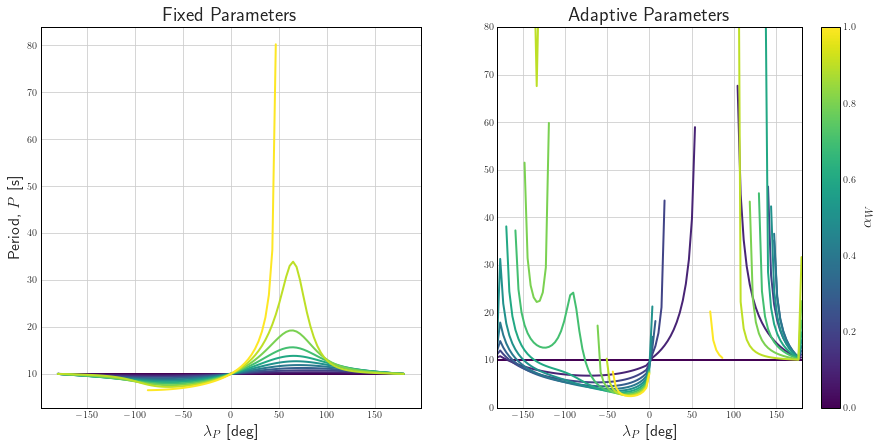

In [125]:
plot_lw = 2
cmap = plt.cm.get_cmap('viridis', len_alpW)

fig = plt.figure(figsize=(15,7))
spec = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)

ax1 = fig.add_subplot(spec[:, 0])
ax2 = fig.add_subplot(spec[:, 1])

ax1.set_title(r'Fixed Parameters')
ax1.set_xlabel(r'${\lambda_P}$ [deg]')
ax1.set_ylabel(r'Period, $P$ [s]')
for i in range(len_alpW):
    ax1.plot(np.rad2deg(lP_data), Pfixed[i,:], linewidth=plot_lw, color=cmap(i))
# ax1.annotate(r'$P_0$', xy=(-80, P1), xytext=(-100, P1+2), arrowprops=dict(arrowstyle="->"), fontsize=14)
# ax1.set_ylim([0, 80])

ax2.set_title(r'Adaptive Parameters')
ax2.set_xlabel(r'${\lambda_P}$ [deg]')
# ax2.set_ylabel(r'$P$ [s]')
for i in range(len_alpW):
#     ax2.plot(np.rad2deg(lP_data), 2*np.pi/np.sqrt(kadapt[i,:] * (np.pi / Tadapt[i,:] - omW_data[i,:])), linewidth=plot_lw, color=cmap(i))
    ax2.plot(np.rad2deg(lP_data), Padapt[i,:], linewidth=plot_lw, color=cmap(i))
ax2.set_xlim([np.rad2deg(lP_data[0]), np.rad2deg(lP_data[-1])])
ax2.set_ylim([0, 80])

# ax1.set_title(r'Damping Ratio')
# ax1.set_xlabel(r'${\lambda_P}$ [deg]')
# ax1.set_ylabel(r'$\zeta$')
# for i in range(len_alpW):
#     ax1.plot(np.rad2deg(lP_data), zeta_data[i,:], linewidth=plot_lw, color=cmap(i))

# plot dummy data to have stand alone colorbar
dummy_array = np.array([[0,1]])
dummy_plot = ax2.imshow(dummy_array, cmap='viridis')
dummy_plot.set_visible(False)
fig.colorbar(dummy_plot, ax=ax2, label=r'$\alpha_W$')

ax2.set_aspect('auto')
    
plt.show()

In [268]:
display(Math('%s = %s' %(latex(omn),latex(omn_expr.subs({k:k0_expr, T:T0_expr})))))
display(Math('%s = %s' %(latex(zeta),latex(zeta_expr.subs({k:k0_expr, T:T0_expr})))))

P = symbols('P')
P0 = symbols('P_0', real=True, positive=True)
P_expr = 2*pi/omn_expr.subs({k:k0_expr,T:T0_expr})
P_expr = simplify(P_expr.subs(om0, 2*pi/P0))
# display(Math('%s = %s' %(latex(P),latex(P_expr))))

zeta_sub_expr = simplify(zeta_expr.subs({k:k0_expr,T:T0_expr}))
zeta_sub_expr = simplify(zeta_sub_expr.subs(om0, 2*pi/P0))
# display(Math('%s = %s' %(latex(zeta),latex(zeta_sub_expr))))

# eig_p_expr = omn * (-zeta + I * sqrt(1 - zeta**2))
# eig_n_expr = omn * (-zeta - I * sqrt(1 - zeta**2))

# display(Math('s_1 = %s' %latex(eig_p_expr)))
# display(Math('s_2 = %s' %latex(eig_n_expr)))


# s1_simp = simplify(eig_p_expr.subs({omn:omn_expr.subs({k:k0_expr, T:T0_expr}),zeta:zeta_expr.subs({k:k0_expr, T:T0_expr})}))
# s1_simp = simplify(s1_simp.subs(om0,2*pi/P0))
# s2_simp = simplify(eig_n_expr.subs({omn:omn_expr.subs({k:k0_expr, T:T0_expr}),zeta:zeta_expr.subs({k:k0_expr, T:T0_expr})}))
# s2_simp = simplify(s2_simp.subs(om0,2*pi/P0))

# display(Math('s_1 = %s' %latex(s1_simp)))
# display(Math('s_2 = %s' %latex(s2_simp)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [269]:
alpW = symbols('\\alpha_W')

fW = symbols('f_W')
fW_expr = alpA**2 * sin(lP) * cos(lP) / sqrt(1 - alpW**2 * sin(lP)**2) + alpW * sin(lP)
display(Math('%s = %s' %(latex(fW),latex(fW_expr))))

omW_expr = vA * kapP * fW
display(Math('%s = %s = %s' %(latex(omW),latex(omW_expr),latex(omW_expr.subs(fW,fW_expr)))))

# P_expr_sub = P_expr.subs(omW, omW_expr)
# display(Math('%s = %s' %(latex(P),latex(P_expr_sub))))

display(Math('%s = %s' %(latex(P),latex(P_expr))))

display(Math('%s = %s' %(latex(zeta),latex(zeta_sub_expr))))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [262]:
len_lP = 201
len_alpW = 11

lP_data = np.linspace(-np.pi,np.pi,len_lP)
alpW_data = np.linspace(0,1,len_alpW)

fW_data = np.zeros([len_alpW, len_lP])
omW_data = np.zeros([len_alpW, len_lP])
P_data = np.zeros([len_alpW, len_lP])
zeta_data = np.zeros([len_alpW, len_lP])

vA1 = 10
kapP1 = 1/50
P1 = 10
zeta1 = 0.7071

fW_eval = lambdify((lP, alpW), fW_expr, 'numpy')
omW_eval = lambdify((vA, kapP, fW), omW_expr, 'numpy')
P_eval = lambdify((omW, P0, zeta0), P_expr, 'numpy')
zeta_eval = lambdify((omW, P0, zeta0), zeta_sub_expr, 'numpy')

eps_pi_2 = 0.0001
for i in range(len_alpW):
    if alpW_data[i] == 1:
        idx_sel_geq_pi_2 = lP_data >= np.pi/2 - eps_pi_2
        fW_data[i, idx_sel_geq_pi_2] = np.nan
        
        idx_sel_leq_m_pi_2 = lP_data <= -np.pi/2 + eps_pi_2
        fW_data[i, idx_sel_leq_m_pi_2] = np.nan
        
        idx_sel = np.all([~idx_sel_geq_pi_2, ~idx_sel_leq_m_pi_2],axis=0)
        fW_data[i, idx_sel] = fW_eval(lP_data[idx_sel], alpW_data[i])
    else:
        fW_data[i,:] = fW_eval(lP_data, alpW_data[i])
        
    omW_data[i,:] = omW_eval(vA1, kapP1, fW_data[i,:])
    P_data[i,:] = P_eval(omW_data[i,:], P1, zeta1)
    zeta_data[i, :] = zeta_eval(omW_data[i,:], P1, zeta1)
    
# print(P_data[-1,:])
# print(fW_data[-1,:])

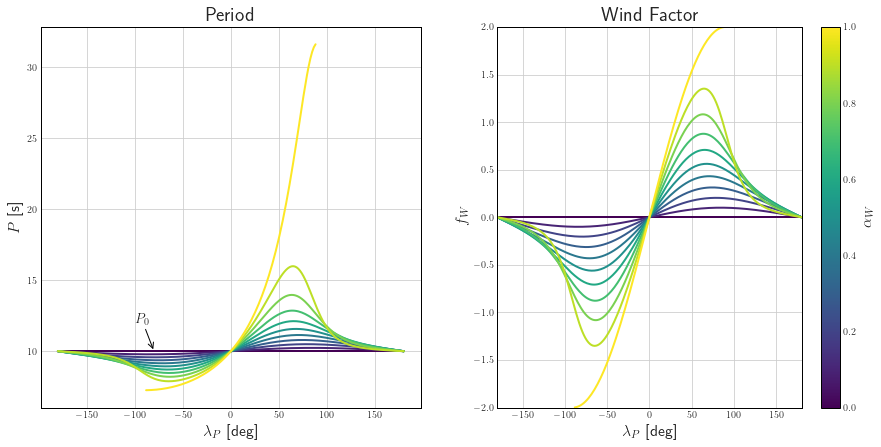

In [267]:
plot_lw = 2
cmap = plt.cm.get_cmap('viridis', len_alpW)

fig = plt.figure(figsize=(15,7))
spec = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)

ax1 = fig.add_subplot(spec[:, 0])
ax2 = fig.add_subplot(spec[:, 1])

ax1.set_title(r'Period')
ax1.set_xlabel(r'${\lambda_P}$ [deg]')
ax1.set_ylabel(r'$P$ [s]')
for i in range(len_alpW):
    ax1.plot(np.rad2deg(lP_data), P_data[i,:], linewidth=plot_lw, color=cmap(i))
ax1.annotate(r'$P_0$', xy=(-80, P1), xytext=(-100, P1+2), arrowprops=dict(arrowstyle="->"), fontsize=14)

ax2.set_title(r'Wind Factor')
ax2.set_xlabel(r'${\lambda_P}$ [deg]')
ax2.set_ylabel(r'$f_W$')
for i in range(len_alpW):
    ax2.plot(np.rad2deg(lP_data), fW_data[i,:], linewidth=plot_lw, color=cmap(i))
ax2.set_xlim(np.rad2deg([lP_data[0], lP_data[-1]]))
ax2.set_ylim([-2, 2])

# plot dummy data to have stand alone colorbar
dummy_array = np.array([[0,1]])
dummy_plot = ax2.imshow(dummy_array, cmap='viridis')
dummy_plot.set_visible(False)
fig.colorbar(dummy_plot, ax=ax2, label=r'$\alpha_W$')

ax2.set_aspect('auto')
    
plt.show()

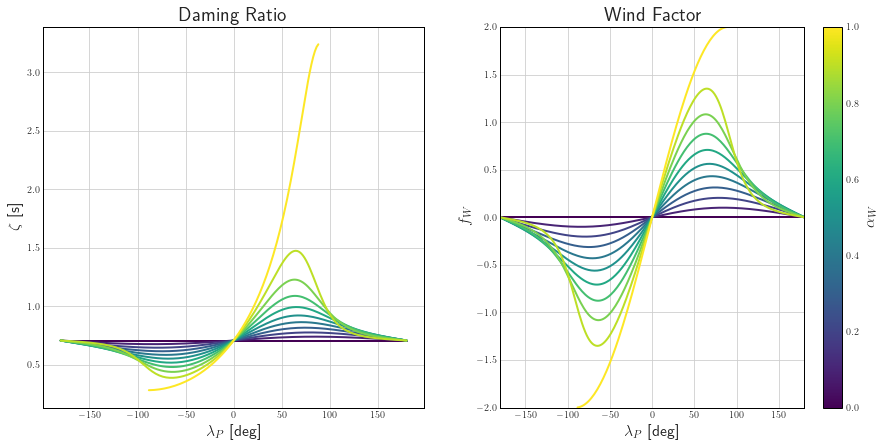

In [264]:
fig = plt.figure(figsize=(15,7))
spec = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)

ax1 = fig.add_subplot(spec[:, 0])
ax2 = fig.add_subplot(spec[:, 1])

ax1.set_title(r'Daming Ratio')
ax1.set_xlabel(r'${\lambda_P}$ [deg]')
ax1.set_ylabel(r'$\zeta$ [s]')
for i in range(len_alpW):
    ax1.plot(np.rad2deg(lP_data), zeta_data[i,:], linewidth=plot_lw, color=cmap(i))

ax2.set_title(r'Wind Factor')
ax2.set_xlabel(r'${\lambda_P}$ [deg]')
ax2.set_ylabel(r'$f_W$')
for i in range(len_alpW):
    ax2.plot(np.rad2deg(lP_data), fW_data[i,:], linewidth=plot_lw, color=cmap(i))
ax2.set_xlim(np.rad2deg([lP_data[0], lP_data[-1]]))
ax2.set_ylim([-2, 2])

# plot dummy data to have stand alone colorbar
dummy_array = np.array([[0,1]])
dummy_plot = ax2.imshow(dummy_array, cmap='viridis')
dummy_plot.set_visible(False)
fig.colorbar(dummy_plot, ax=ax2, label=r'$\alpha_W$')

ax2.set_aspect('auto')
    
plt.show()

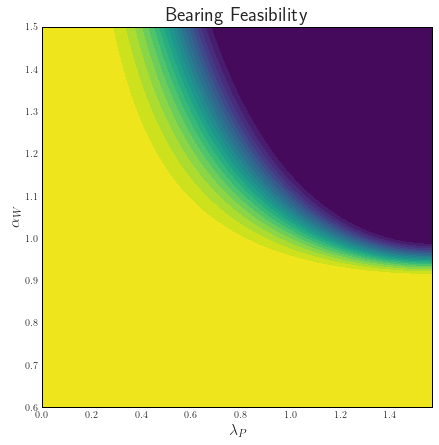

In [218]:
# excess wind case

def bearingfeas(sinlP, coslP, wind_ratio):
    
    SIN_LAMBDA_CO = 0.0349
    COS_LAMBDA_CO = 0.999
    ONE_OVER_S_LAMBDA_CO = 1 / SIN_LAMBDA_CO
    WIND_RATIO_BUF = 0.1
    M_CO = COS_LAMBDA_CO / (SIN_LAMBDA_CO*SIN_LAMBDA_CO)
    
    sin_lambda = np.abs(sinlP)
    if wind_ratio * coslP <= 0.0:
        sin_lambda = 1

    # upper and lower feasibility barriers
    wind_ratio_ub = 0
    wind_ratio_lb = 0
    if sin_lambda < SIN_LAMBDA_CO: 
        # linear finite cut-off
        mx = M_CO * (SIN_LAMBDA_CO - sin_lambda)
        wind_ratio_ub_co = ONE_OVER_S_LAMBDA_CO
        wind_ratio_ub = wind_ratio_ub_co + mx
        wind_ratio_lb_co = (ONE_OVER_S_LAMBDA_CO - 2.0) * WIND_RATIO_BUF + 1.0
        wind_ratio_lb = wind_ratio_lb_co + WIND_RATIO_BUF * mx
    else:
        one_over_s_lambda = 1.0 / sin_lambda
        wind_ratio_ub = one_over_s_lambda
        wind_ratio_lb = (one_over_s_lambda - 2.0) * WIND_RATIO_BUF + 1.0

    # calculate bearing feasibility
    feas = 1.0
    if wind_ratio > wind_ratio_ub:
        # infeasible
        feas = 0.0
    elif wind_ratio > wind_ratio_lb:
        # partially feasible
        # smoothly transition from fully feasible to infeasible
        feas = np.cos(np.pi/2 * np.clip((wind_ratio - wind_ratio_lb) / (wind_ratio_ub - wind_ratio_lb), 0.0, 1.0))
        feas = feas * feas

    return feas

len_wr = 201
len_lP_ex = 201
wr_excess_data = np.linspace(0.6, 1.5, len_wr)
lP_excess_data = np.linspace(0, np.pi/2, len_lP_ex)
sinlP = np.sin(lP_excess_data)
coslP = np.cos(lP_excess_data)

feas_data = np.zeros([len_wr,len_lP_ex])
for i in range(len_wr):
    for j in range(len_lP_ex):
        feas_data[i,j] = bearingfeas(sinlP[j], coslP[j], wr_excess_data[i])

fig, ax = plt.subplots(figsize=(7,7))

# xx, yy = np.meshgrid(sinlP, wr_excess_data)
xx, yy = np.meshgrid(lP_excess_data, wr_excess_data)

ax.contourf(xx, yy, feas_data, 21, cmap=plt.cm.viridis)
ax.set_title(r'Bearing Feasibility')
# plt.xlabel(r'$\sin\lambda_P$')
ax.set_xlabel(r'$\lambda_P$')
ax.set_ylabel(r'$\alpha_W$')
# plt.xlim([sinlP[0], sinlP[-1]])
ax.set_xlim([lP_excess_data[0], lP_excess_data[-1]])



In [277]:
sigf = symbols('\\sigma_f', positive=True, real=True)
a = symbols('a')
s = symbols('s')

omP = vGP * kapP
a11 = -k - pi/T + (1 - sigf) * omW
a12 = a * ( (pi/T - omW) - (1 - sigf) * (omP**2 * T/pi - omW * (a - 2)) )
a21 = -1/a * pi/T
a22 = pi/T - sigf * omW

char_eq_f = (s - a11) * (s - a22) - (-a21) * (-a12)
char_eq_f = Poly(char_eq_f, s)
char_eq_f_coeffs = char_eq_f.coeffs()

display(Math('%s' %latex(char_eq_f_coeffs[0])))
display(Math('%s' %latex(simplify(char_eq_f_coeffs[1]))))
display(Math('%s' %latex(simplify(char_eq_f_coeffs[2]))))

P_f_expr = simplify(2*pi/sqrt(simplify(char_eq_f_coeffs[2])))
P_f_expr = P_f_expr.subs({k:k0_expr,T:T0_expr})
P_f_expr = P_f_expr.subs(om0,2*pi/P0)
display(Math('%s = %s' %(latex(P),latex(P_f_expr))))

# char_eq_f = Poly(char_eq_f.subs(sigf, 1), s)
# char_eq_f_coeffs = char_eq_f.coeffs()

# display(Math('%s' %latex(char_eq_f_coeffs[0])))
# display(Math('%s' %latex(simplify(char_eq_f_coeffs[1]))))
# display(Math('%s' %latex(simplify(char_eq_f_coeffs[2]))))


P_f_eval = lambdify((P0,zeta0,sigf,kapP,vGP,omW,a,), P_f_expr, 'numpy')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [296]:
len_alpW_excess = 11

alpW_excess_data = np.linspace(1,2,len_alpW_excess)
sinlP = np.sin(lP_data)
coslP = np.cos(lP_data)

feas_data = np.zeros([len_alpW_excess,len_lP])
for i in range(len_alpW_excess):
    for j in range(len_lP):
        feas_data[i,j] = bearingfeas(sinlP[j], coslP[j], alpW_excess_data[i])

fW_excess_data = np.empty((len_alpW_excess, len_lP))
fW_excess_data[:] = np.NaN
omW_excess_data = np.empty((len_alpW_excess, len_lP))
omW_excess_data[:] = np.NaN
P_excess_data = np.empty((len_alpW_excess, len_lP))
P_excess_data[:] = np.NaN
zeta_excess_data = np.empty((len_alpW_excess, len_lP))
zeta_excess_data[:] = np.NaN

for i in range(len_alpW_excess):
    feas_cond = np.abs(lP_data) < np.arcsin(1 / alpW_excess_data[i])

    a_data = alpW_excess_data[i] * np.cos(lP_data[feas_cond]) / np.sqrt(1 - alpW_excess_data[i]**2 * np.sin(lP_data[feas_cond])**2) + 1
    a_data[a_data==np.inf]=np.nan
    
    vGP_data = vA1 * (alpW_excess_data[i] * np.cos(lP_data[feas_cond]) + np.sqrt(1 - alpW_excess_data[i]**2 * np.sin(lP_data[feas_cond])**2))
    
    fW_excess_data[i, feas_cond] = fW_eval(lP_data[feas_cond], alpW_excess_data[i])
    omW_excess_data[i, feas_cond] = omW_eval(vA1, kapP1, fW_excess_data[i, feas_cond])
    omW_excess_data[i, omW_excess_data[i, :]==-np.inf]=np.nan
    
    P_excess_data[i, feas_cond] = P_f_eval(P1,zeta1,feas_data[i, feas_cond],kapP1,vGP_data,omW_excess_data[i, feas_cond],a_data)
#     zeta_excess_data[i, feas_cond] = zeta_f_eval(omW_excess_data[i, feas_cond], P1, zeta1)

<ipython-input-296-ae349f4e793d>:24: RuntimeWarning: divide by zero encountered in true_divide
  a_data = alpW_excess_data[i] * np.cos(lP_data[feas_cond]) / np.sqrt(1 - alpW_excess_data[i]**2 * np.sin(lP_data[feas_cond])**2) + 1
<lambdifygenerated-153>:2: RuntimeWarning: divide by zero encountered in true_divide
  return (Dummy_252**2*sin(Dummy_251)*cos(Dummy_251)/sqrt(-Dummy_252**2*sin(Dummy_251)**2 + 1) + Dummy_252*sin(Dummy_251))
<lambdifygenerated-164>:2: RuntimeWarning: invalid value encountered in sqrt
  return (2*pi*sqrt(Dummy_294)*sqrt(P_0)/sqrt(Dummy_294*P_0*(Dummy_293**2*Dummy_295*Dummy_297**2 - Dummy_293**2*Dummy_297**2 + 4*pi*Dummy_294*Dummy_295*Dummy_296/P_0 + Dummy_295**2*Dummy_296**2 - Dummy_295*Dummy_296**2) - 4*pi**2*Dummy_294/P_0 - pi*Dummy_295*Dummy_296*a + 2*pi*Dummy_295*Dummy_296 + pi*Dummy_296*a - 2*pi*Dummy_296))


[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan]
[        nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan 

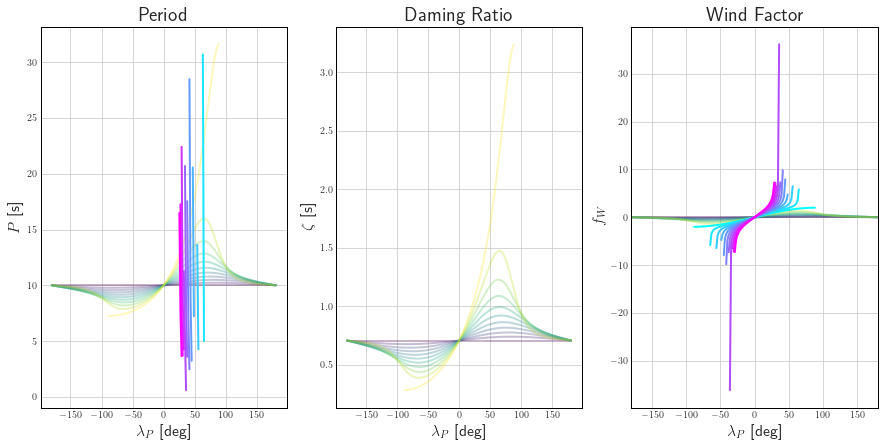

In [295]:
cmap_excess = plt.cm.get_cmap('cool', len_alpW_excess)

fig = plt.figure(figsize=(15,7))
spec = gridspec.GridSpec(ncols=3, nrows=1, figure=fig)

ax1 = fig.add_subplot(spec[:, 0])
ax2 = fig.add_subplot(spec[:, 1])
ax3 = fig.add_subplot(spec[:, 2])

ax1.set_title(r'Period')
ax1.set_xlabel(r'${\lambda_P}$ [deg]')
ax1.set_ylabel(r'$P$ [s]')

# lower wind case
for i in range(len_alpW):
    cmapi = cmap(i)[:-1] + (0.3,)
    ax1.plot(np.rad2deg(lP_data), P_data[i,:], linewidth=plot_lw, color=cmapi)
    
# excess wind case 
for i in range(len_alpW_excess):
    print(P_excess_data[i,:])
    ax1.plot(np.rad2deg(lP_data), P_excess_data[i,:], linewidth=plot_lw, color=cmap_excess(i))

ax2.set_title(r'Daming Ratio')
ax2.set_xlabel(r'${\lambda_P}$ [deg]')
ax2.set_ylabel(r'$\zeta$ [s]')

# lower wind case
for i in range(len_alpW):
    cmapi = cmap(i)[:-1] + (0.3,)
    ax2.plot(np.rad2deg(lP_data), zeta_data[i,:], linewidth=plot_lw, color=cmapi)

# excess wind case 
for i in range(len_alpW_excess):
    ax2.plot(np.rad2deg(lP_data), zeta_excess_data[i,:], linewidth=plot_lw, color=cmap_excess(i))

ax3.set_title(r'Wind Factor')
ax3.set_xlabel(r'${\lambda_P}$ [deg]')
ax3.set_ylabel(r'$f_W$')

# lower wind case
for i in range(len_alpW):
    cmapi = cmap(i)[:-1] + (0.3,)
    ax3.plot(np.rad2deg(lP_data), fW_data[i,:], linewidth=plot_lw, color=cmapi)

# excess wind case 
for i in range(len_alpW_excess):
    ax3.plot(np.rad2deg(lP_data), fW_excess_data[i,:], linewidth=plot_lw, color=cmap_excess(i))
ax3.set_xlim(np.rad2deg([lP_data[0], lP_data[-1]]))
# ax3.set_ylim([-2, 2])

# plot dummy data to have stand alone colorbar
# cmap1 = plt.cm.viridis(np.linspace(0, 1, 128))
# cmap2 = plt.cm.autumn(np.linspace(0, 1, 128))
# dummy_array = np.array([[0,2]])
# dummy_plot = ax3.imshow(dummy_array, cmap='viridis')
# dummy_plot.set_visible(False)
# fig.colorbar(dummy_plot, ax=ax3, label=r'$\alpha_W$')
    
plt.show()